# CS506 Final Project
### Seokhoon Shin & Joshua Nahm

## 1. Importing Library and Dataset('rideshare_kaggle.csv')

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')


In [3]:
from google.colab import files
uploaded = files.upload()

Saving rideshare_kaggle.csv to rideshare_kaggle.csv


In [4]:
df = pd.read_csv('rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


## 2. EDA

### EDA process summary
We initially attempted to examine the dataset for missing values, data types, basic statistical summaries, and correlations to identify and remove irrelevant, redundant, or highly correlated features. However, due to the large number of features, it was challenging to filter them effectively through this process alone. Therefore, we decided to focus on a selected set of meaningful features that are directly relevant to ride price prediction, including time, location, service type, distance, surge multiplier, and weather-related variables. This approach allowed us to simplify the dataset, enhance interpretability, and prepare the data for effective modeling.

In [5]:
# check missing values
print("Missing values:\n", df.isnull().sum())

# check data types
print("\nData types:\n", df.dtypes)

# check statistics
print("\nSummary statistics:\n", df.describe())

Missing values:
 id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime         

In [6]:
# drop missing value from 'price'
df = df.dropna(subset=['price'])
df.isnull().sum().sum()

0

In [51]:
# check highly correlated features
#umeric_df = df.select_dtypes(include=['float64', 'int64'])
#corr_matrix = numeric_df.corr().abs()
#np.fill_diagonal(corr_matrix.values, 0)

#high_corr = corr_matrix[corr_matrix > 0.9].stack().reset_index()
#high_corr.columns = ['Feature1', 'Feature2', 'Correlation']

#high_corr = high_corr[high_corr['Feature1'] < high_corr['Feature2']]

#print("\n Highly Correlated Feature Pairs (Correlation > 0.9):\n")
#print(high_corr)
# drop redundant / unnecessary features
#high_corr_pairs = np.where(corr_matrix > 0.9)

#to_drop = set()
#for i in range(len(high_corr_pairs[0])):
    #col1 = corr_matrix.columns[high_corr_pairs[0][i]]
    #col2 = corr_matrix.columns[high_corr_pairs[1][i]]
    #to_drop.add(col2)

#print(f"\n Columns to drop due to high correlation (>0.9): {to_drop}")

#df = df.drop(columns=list(to_drop))

#print("\n Redundant columns dropped successfully")
#print("Remaining columns:\n", df.columns.tolist())

#plt.figure(figsize=(10,8))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
#plt.title('Correlation Heatmap After Removing Redundant Features')
#plt.show()

In [47]:
# dropping unnecessary features
columns_to_keep = [
    'hour', 'day', 'month',           # for time
    'source', 'destination',          # location
    'cab_type', 'name',               # service (uber vs lyft)
    'price', 'distance', 'surge_multiplier',  # price related
    'temperature', 'humidity', 'windSpeed'   # weather related
]

df = df.drop(columns=[col for col in df.columns if col not in columns_to_keep])

print("\n Final DataFrame shape:", df.shape)
print("\n Remaining columns:\n", df.columns.tolist())



 Final DataFrame shape: (607114, 13)

 Remaining columns:
 ['hour', 'day', 'month', 'source', 'destination', 'cab_type', 'name', 'price', 'distance', 'surge_multiplier', 'temperature', 'humidity', 'windSpeed']


### Visualization analysis

#### 1) For time (Uber vs Lyft)

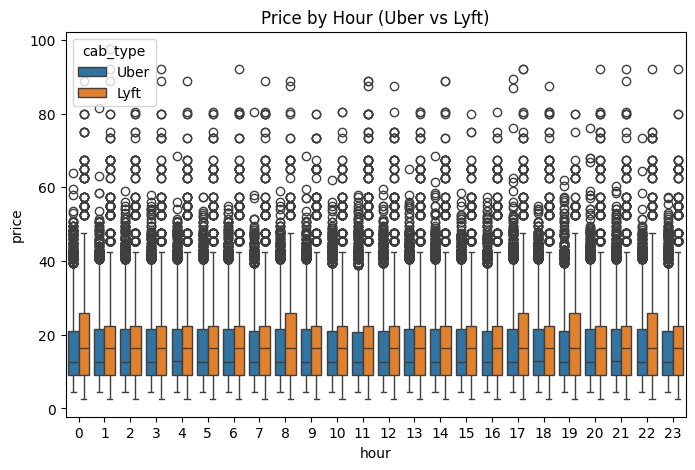

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x='hour', y='price', hue='cab_type', data=df)
plt.title('Price by Hour (Uber vs Lyft)')
plt.show()

#### a) remove outliers

In [9]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f"\n '{column}' complete: {df.shape[0]} → {df_filtered.shape[0]} rows left")
    return df_filtered

# remove outliers in important numerical features that can influence the models
for col in ['price', 'distance', 'surge_multiplier']:
    df = remove_outliers_iqr(df, col)

print(df.shape)
df.head()


 'price' complete: 637976 → 632387 rows left

 'distance' complete: 632387 → 625229 rows left

 'surge_multiplier' complete: 625229 → 607114 rows left
(607114, 13)


,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,humidity,windSpeed
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,0.68,8.66
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,0.94,11.98
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,0.75,7.33
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,0.73,5.28
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,0.70,9.14


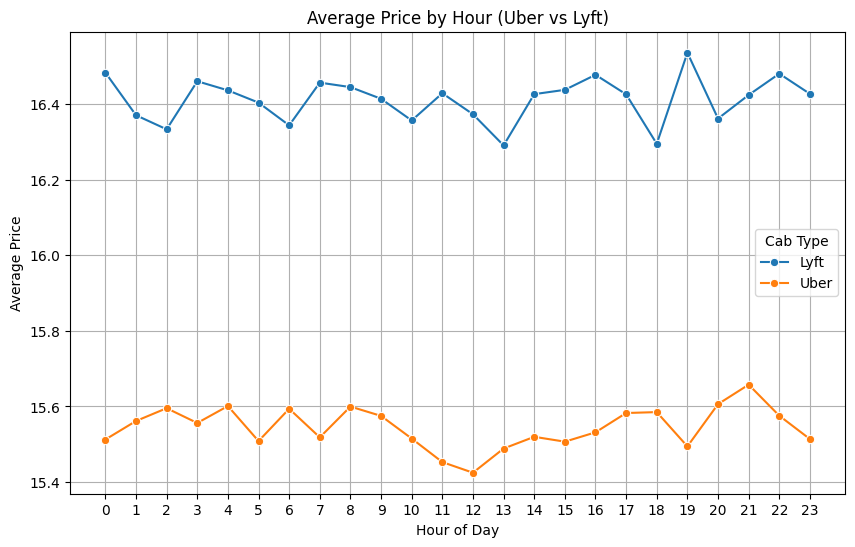

In [10]:
# Average_Hours by Price (Uber vs Lyft)
hourly_avg_price = df.groupby(['hour', 'cab_type'])['price'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='hour', y='price', hue='cab_type', data=hourly_avg_price, marker='o')
plt.title('Average Price by Hour (Uber vs Lyft)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Price')
plt.xticks(range(0, 24))  # 0~23
plt.legend(title='Cab Type')
plt.grid(True)
plt.show()

#####  Lyft tends to be consistently more expensive than Uber throughout the day.

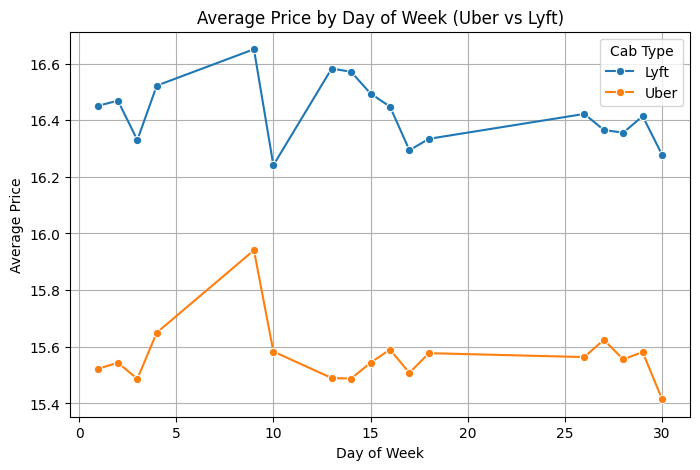

In [11]:
# Average_days by Price (Uber vs Lyft)
day_avg_price = df.groupby(['day', 'cab_type'])['price'].mean().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.lineplot(x='day', y='price', hue='cab_type', data=day_avg_price, marker='o')
plt.title('Average Price by Day of Week (Uber vs Lyft)')
plt.xlabel('Day of Week')
plt.ylabel('Average Price')
plt.legend(title='Cab Type')
plt.grid(True)
plt.show()


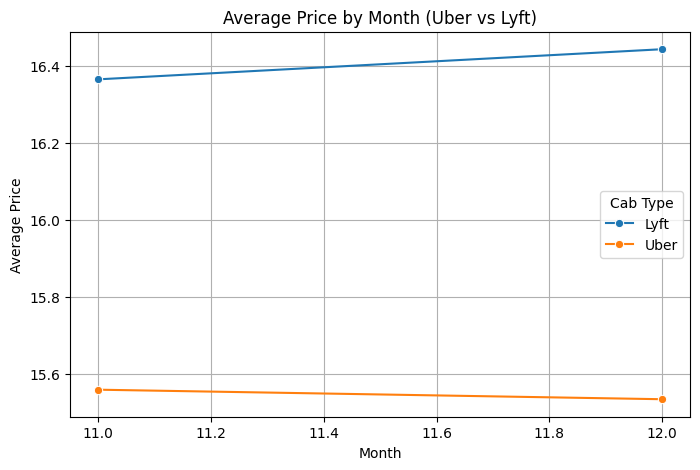

In [12]:
# Average_month by Price (Uber vs Lyft)
month_avg_price = df.groupby(['month', 'cab_type'])['price'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x='month', y='price', hue='cab_type', data=month_avg_price, marker='o')
plt.title('Average Price by Month (Uber vs Lyft)')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.legend(title='Cab Type')
plt.grid(True)
plt.show()

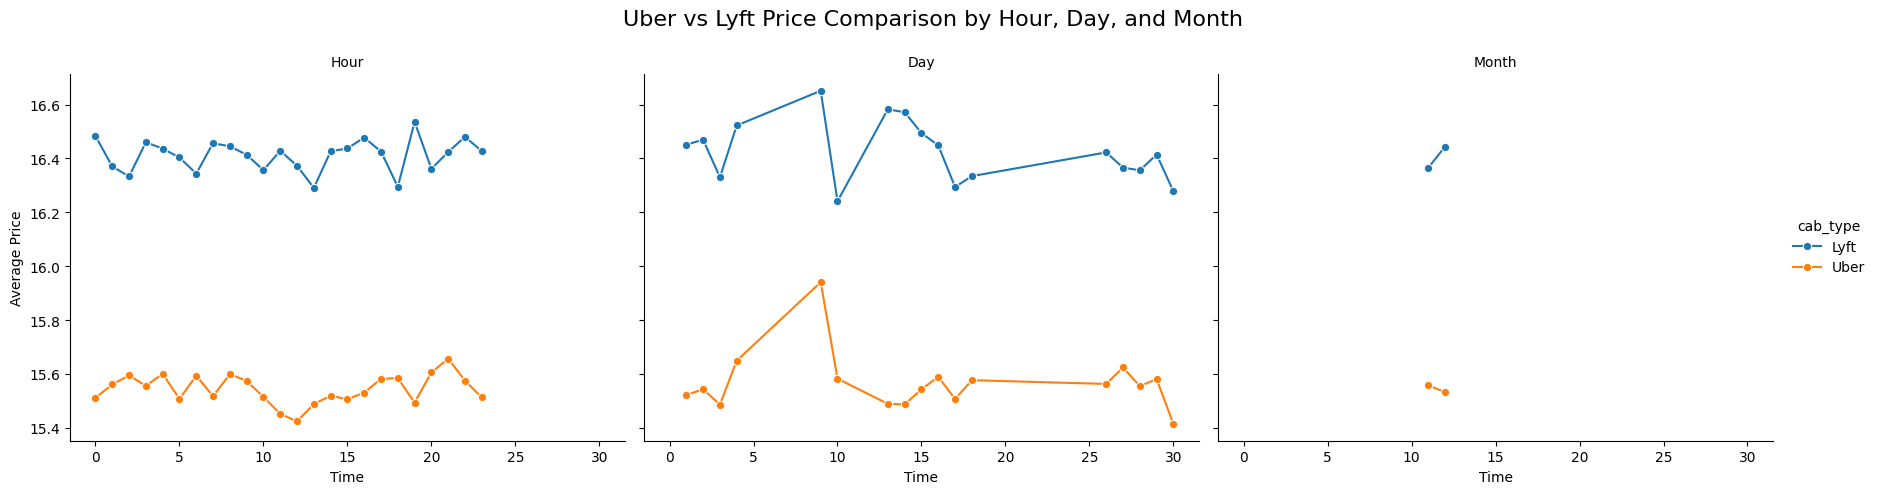

In [13]:
#All in one
hourly_avg_price = df.groupby(['hour', 'cab_type'])['price'].mean().reset_index()
daily_avg_price = df.groupby(['day', 'cab_type'])['price'].mean().reset_index()
monthly_avg_price = df.groupby(['month', 'cab_type'])['price'].mean().reset_index()

hourly_avg_price['time_unit'] = 'Hour'
daily_avg_price['time_unit'] = 'Day'
monthly_avg_price['time_unit'] = 'Month'

hourly_avg_price.rename(columns={'hour': 'time_value'}, inplace=True)
daily_avg_price.rename(columns={'day': 'time_value'}, inplace=True)
monthly_avg_price.rename(columns={'month': 'time_value'}, inplace=True)

combined_df = pd.concat([hourly_avg_price, daily_avg_price, monthly_avg_price], ignore_index=True)

g = sns.FacetGrid(combined_df, col='time_unit', hue='cab_type', height=5, aspect=1.2, sharey=True)
g.map(sns.lineplot, 'time_value', 'price', marker='o').add_legend()
g.set_titles("{col_name}")
g.set_axis_labels("Time", "Average Price")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Uber vs Lyft Price Comparison by Hour, Day, and Month', fontsize=16)
plt.show()

##### The comparison of average ride prices by hour, day, and month shows that Lyft consistently charges higher prices than Uber across all time periods. Both services maintain relatively stable pricing throughout the day and month, with Lyft’s prices slightly increasing over time. Day-to-day fluctuations are more noticeable, especially for Uber, indicating potential variations in demand or promotions.

#### For Location (Uber vs Lyft)

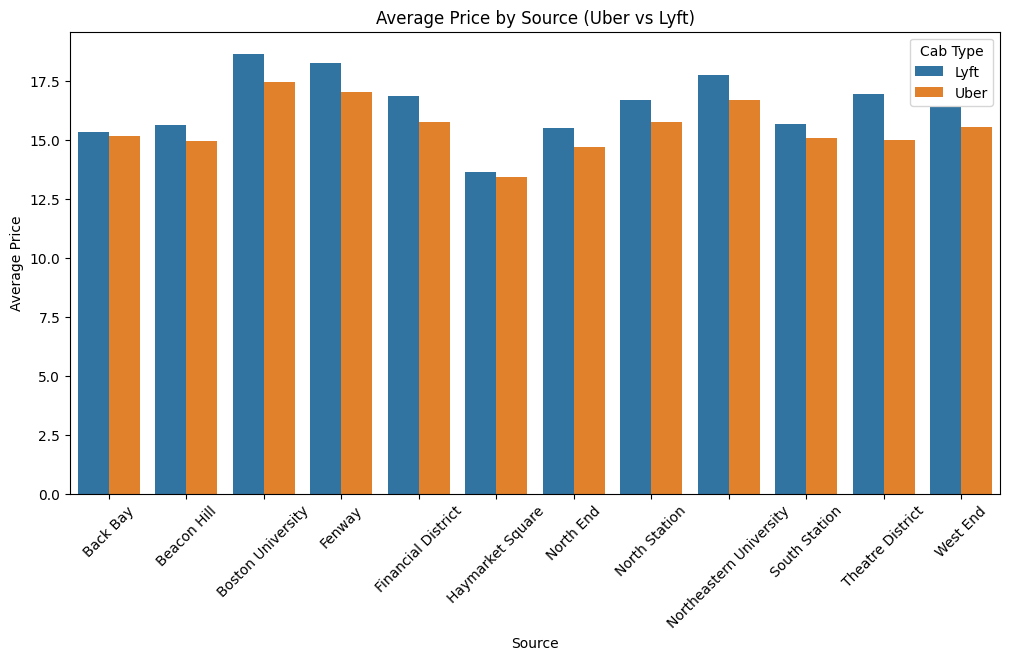

In [14]:
# Average price by source
source_avg_price = df.groupby(['source', 'cab_type'])['price'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='source', y='price', hue='cab_type', data=source_avg_price)
plt.title('Average Price by Source (Uber vs Lyft)')
plt.xlabel('Source')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Cab Type')
plt.show()

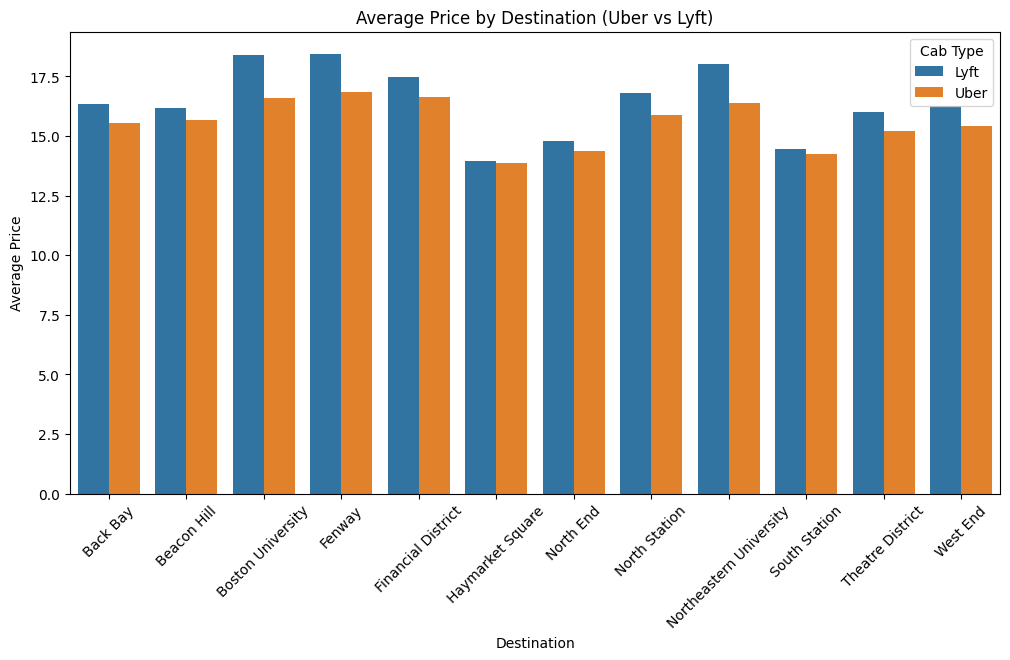

In [15]:
# average price by destination
destination_avg_price = df.groupby(['destination', 'cab_type'])['price'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='destination', y='price', hue='cab_type', data=destination_avg_price)
plt.title('Average Price by Destination (Uber vs Lyft)')
plt.xlabel('Destination')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Cab Type')
plt.show()

##### The analysis shows that Lyft consistently charges higher average prices than Uber across all major destinations. The price gap is especially noticeable in areas like Boston University, Fenway, and Northeastern University, indicating possible differences in pricing strategies or demand between the two services.

### 3) For services (Uber vs Lyft)

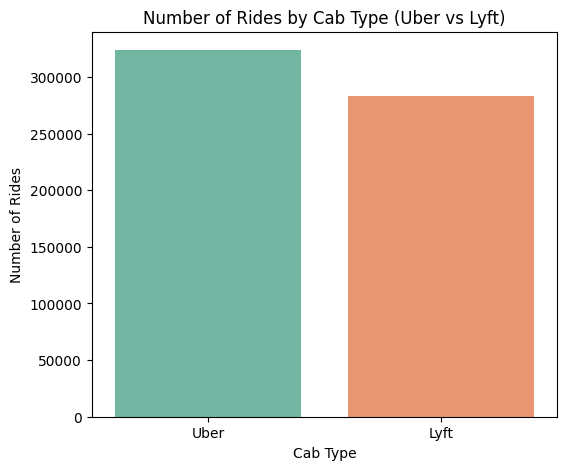

In [16]:
# cab_type ride count
cab_type_count = df['cab_type'].value_counts().reset_index()
cab_type_count.columns = ['cab_type', 'count']

plt.figure(figsize=(6,5))
sns.barplot(x='cab_type', y='count', data=cab_type_count, palette='Set2')
plt.title('Number of Rides by Cab Type (Uber vs Lyft)')
plt.ylabel('Number of Rides')
plt.xlabel('Cab Type')
plt.show()

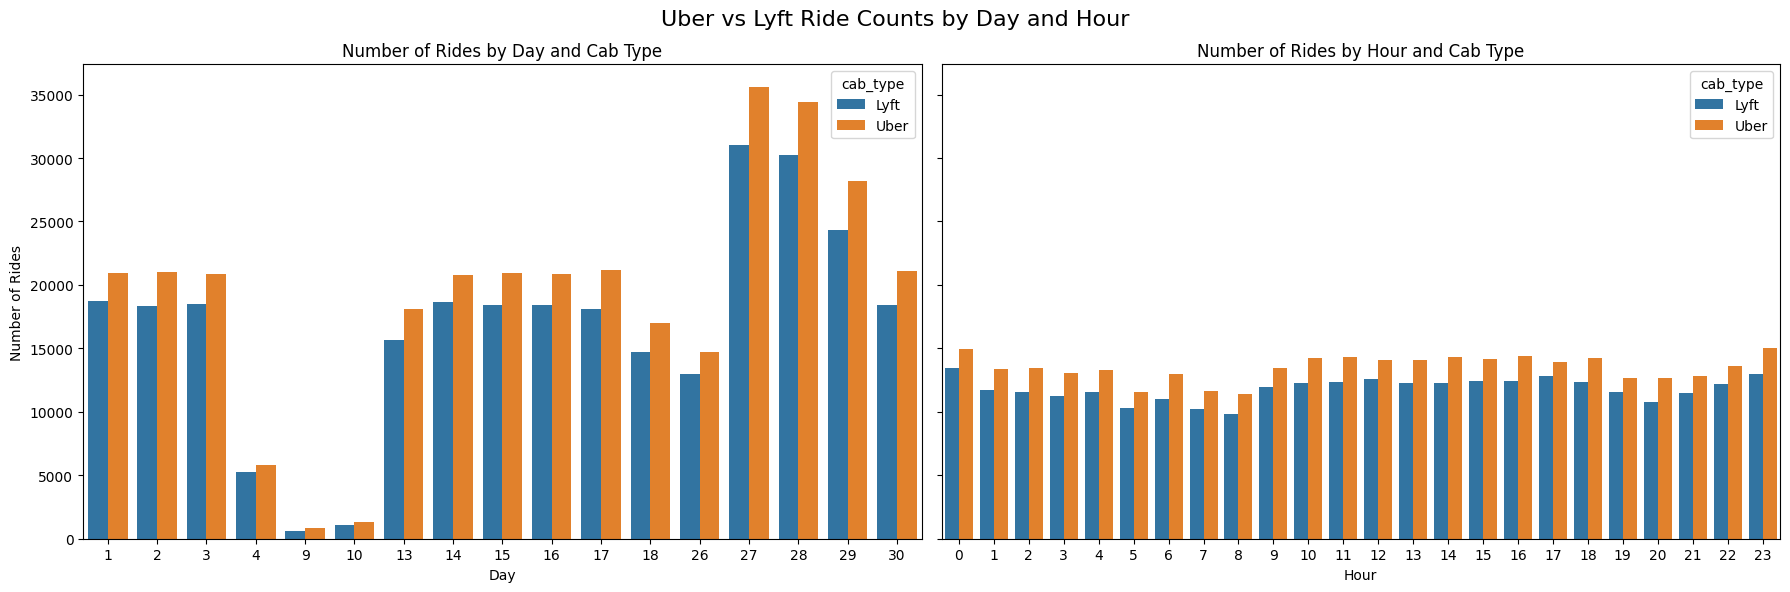

In [17]:
# Uber vs Lyft Ride Counts by Day & Hour
df_day_counts = df.groupby(['day', 'cab_type']).size().reset_index(name='counts')
df_hour_counts = df.groupby(['hour', 'cab_type']).size().reset_index(name='counts')
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

sns.barplot(x='day', y='counts', hue='cab_type', data=df_day_counts, ax=axes[0])
axes[0].set_title('Number of Rides by Day and Cab Type')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Number of Rides')

sns.barplot(x='hour', y='counts', hue='cab_type', data=df_hour_counts, ax=axes[1])
axes[1].set_title('Number of Rides by Hour and Cab Type')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('')

handles, labels = axes[1].get_legend_handles_labels()
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Uber vs Lyft Ride Counts by Day and Hour', fontsize=16)
plt.show()


##### Uber consistently has more rides than Lyft throughout both the day and hour. Particularly, there are noticeable peaks in ride counts on specific days, especially towards the end of the month. Ride demand appears to be relatively stable across different hours of the day, but Uber maintains a higher number of rides compared to Lyft in all time periods.

### 4) Price, distance, surge multiplier analysis

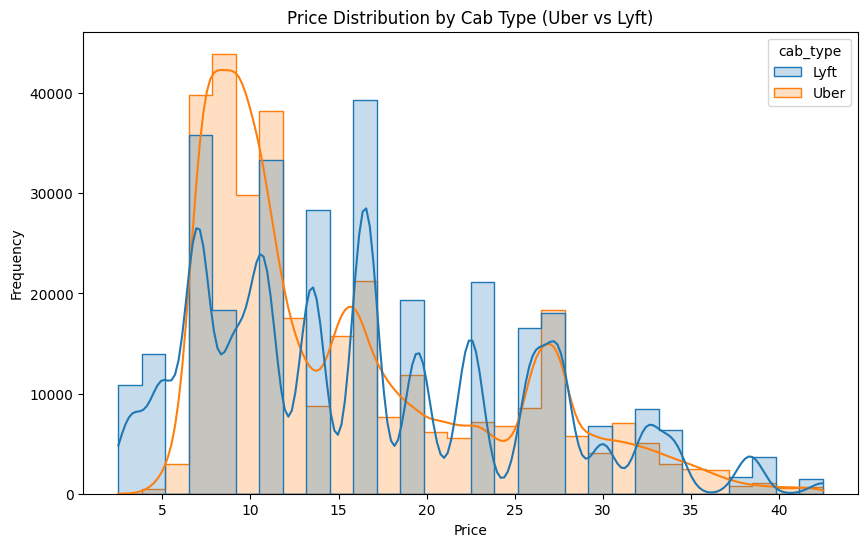

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='price', hue='cab_type', bins=30, kde=True, element='step')
plt.title('Price Distribution by Cab Type (Uber vs Lyft)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

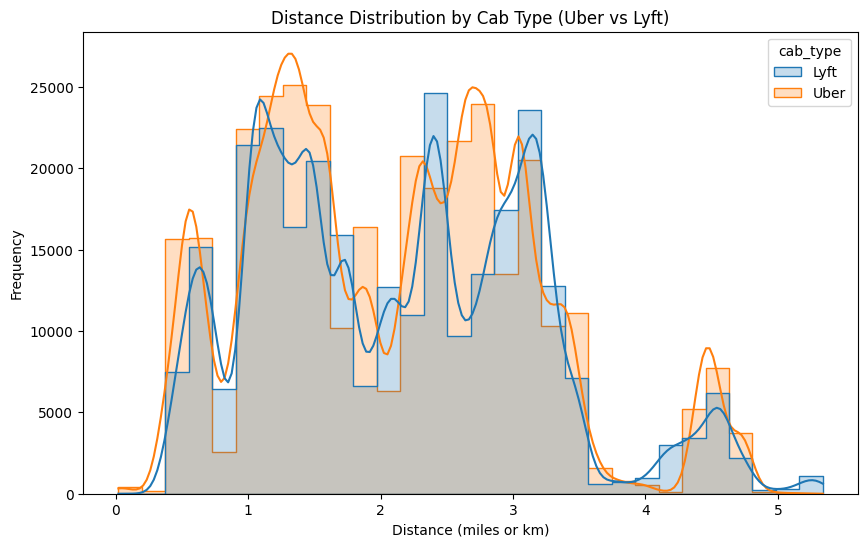

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='distance', hue='cab_type', bins=30, kde=True, element='step')
plt.title('Distance Distribution by Cab Type (Uber vs Lyft)')
plt.xlabel('Distance (miles or km)')
plt.ylabel('Frequency')
plt.show()

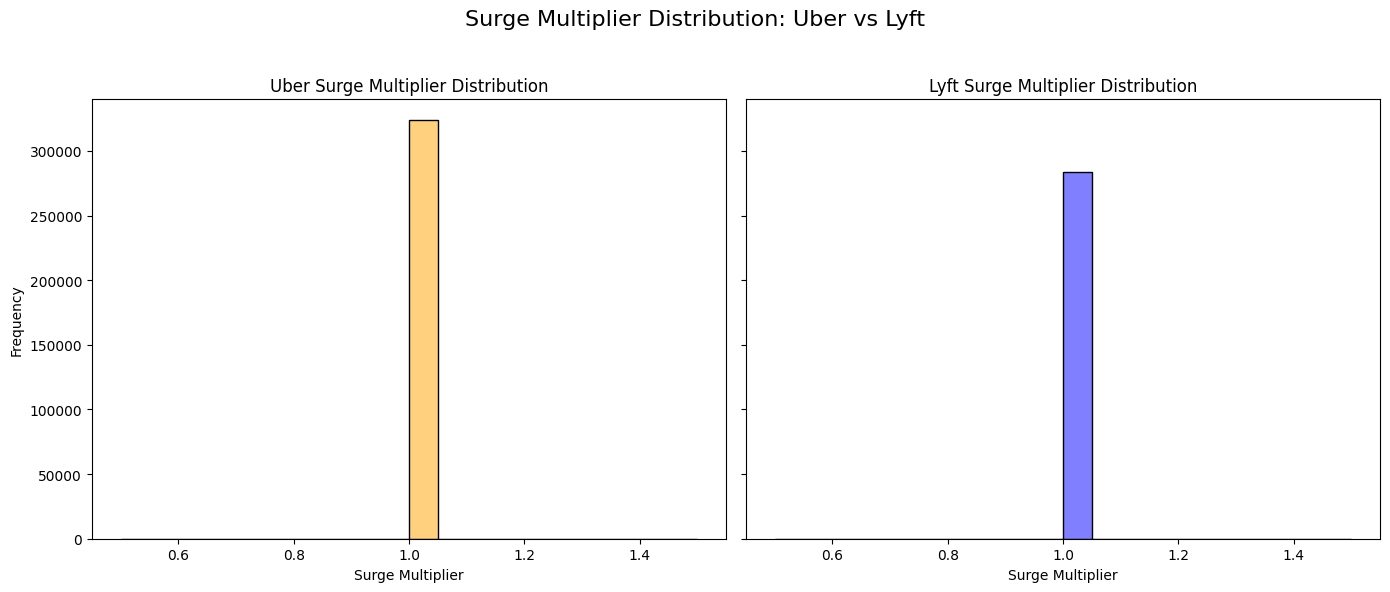

In [20]:
# Surge Multiplier is a dynamic pricing factor applied when ride demand exceeds supply, increasing the fare to balance the market.

df_uber = df[df['cab_type'] == 'Uber']
df_lyft = df[df['cab_type'] == 'Lyft']

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(data=df_uber, x='surge_multiplier', bins=20, kde=True, color='orange', ax=axes[0])
axes[0].set_title('Uber Surge Multiplier Distribution')
axes[0].set_xlabel('Surge Multiplier')
axes[0].set_ylabel('Frequency')

sns.histplot(data=df_lyft, x='surge_multiplier', bins=20, kde=True, color='blue', ax=axes[1])
axes[1].set_title('Lyft Surge Multiplier Distribution')
axes[1].set_xlabel('Surge Multiplier')
axes[1].set_ylabel('')

plt.suptitle('Surge Multiplier Distribution: Uber vs Lyft', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##### The price distribution shows that Uber rides tend to be slightly cheaper and more concentrated around lower prices compared to Lyft, which has a wider spread of higher prices. In terms of distance, both Uber and Lyft show similar patterns, but Uber rides are slightly more concentrated around shorter distances. Finally, the surge multiplier analysis indicates that nearly all rides for both Uber and Lyft have a surge multiplier of 1.0, meaning surge pricing was rarely applied in the dataset.

### 5) Weather related (Uber vs Lyft)

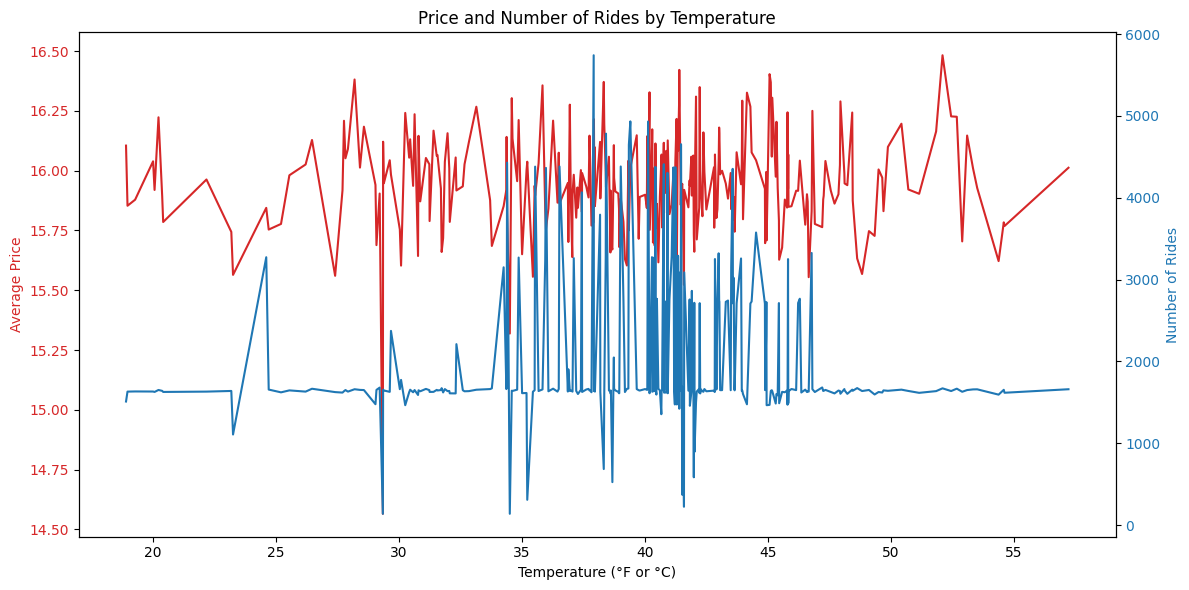

In [38]:
# temperature
temp_price = df.groupby('temperature')['price'].mean()
temp_count = df.groupby('temperature').size()
fig, ax1 = plt.subplots(figsize=(12,6))

color = 'tab:red'
ax1.set_xlabel('Temperature (°F or °C)')
ax1.set_ylabel('Average Price', color=color)
ax1.plot(temp_price.index, temp_price.values, color=color, label='Average Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Number of Rides', color=color)
ax2.plot(temp_count.index, temp_count.values, color=color, label='Number of Rides')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Price and Number of Rides by Temperature')
fig.tight_layout()
plt.show()

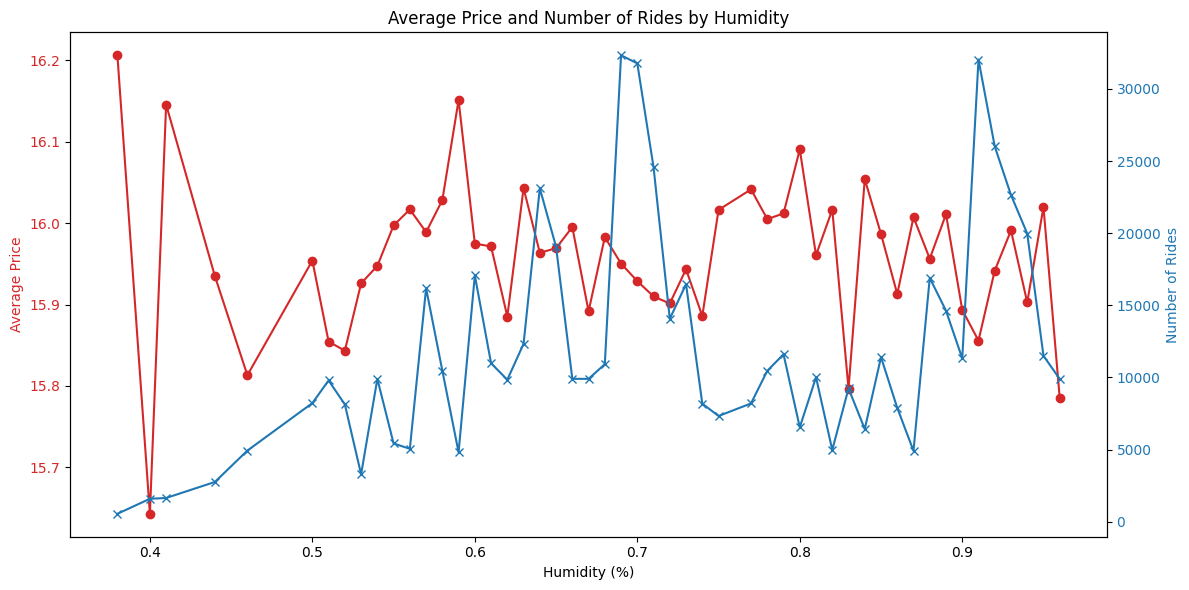

In [39]:
# Humidity
humidity_price = df.groupby('humidity')['price'].mean()
humidity_count = df.groupby('humidity').size()
fig, ax1 = plt.subplots(figsize=(12,6))

color = 'tab:red'
ax1.set_xlabel('Humidity (%)')
ax1.set_ylabel('Average Price', color=color)
ax1.plot(humidity_price.index, humidity_price.values, color=color, label='Average Price', marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Number of Rides', color=color)
ax2.plot(humidity_count.index, humidity_count.values, color=color, label='Number of Rides', marker='x')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Average Price and Number of Rides by Humidity')
fig.tight_layout()
plt.show()


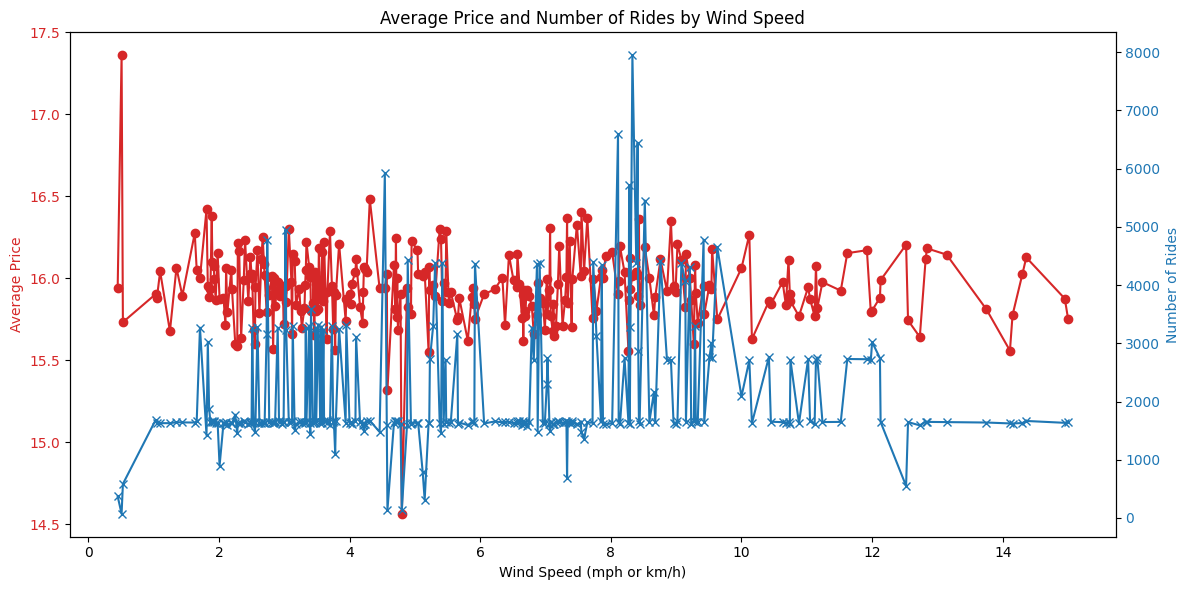

In [40]:
# windspeed
wind_price = df.groupby('windSpeed')['price'].mean()
wind_count = df.groupby('windSpeed').size()
fig, ax1 = plt.subplots(figsize=(12,6))

color = 'tab:red'
ax1.set_xlabel('Wind Speed (mph or km/h)')
ax1.set_ylabel('Average Price', color=color)
ax1.plot(wind_price.index, wind_price.values, color=color, label='Average Price', marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Number of Rides', color=color)
ax2.plot(wind_count.index, wind_count.values, color=color, label='Number of Rides', marker='x')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Average Price and Number of Rides by Wind Speed')
fig.tight_layout()
plt.show()


##### While average prices remain relatively stable across different weather conditions, the number of rides fluctuates significantly, showing that demand for Uber and Lyft is more sensitive to environmental factors like temperature, humidity, and wind speed than prices are.

## 3) Data Preprocessing

### Correlation Heat map

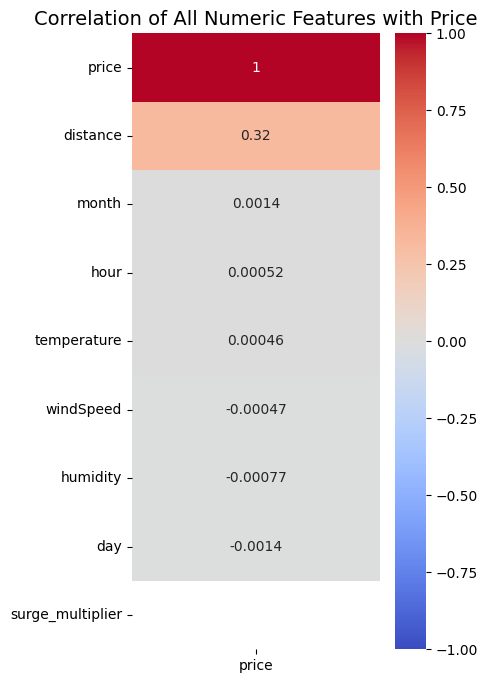

In [44]:
full_numeric_features = [
    'hour', 'day', 'month',
    'distance',
    'surge_multiplier',
    'temperature', 'humidity', 'windSpeed',
    'price'
]

full_corr_df = df[full_numeric_features]

full_price_corr = full_corr_df.corr()[['price']].sort_values(by='price', ascending=False)

plt.figure(figsize=(4, 8))
sns.heatmap(full_price_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of All Numeric Features with Price', fontsize=14)
plt.show()


##### Based on the correlation heatmap, surge_multiplier, day, humidity, and windSpeed, can be dropped to simplify the model without losing much predictive power.

In [48]:
# Final drop based on numerical features correlation with price
drop_cols = ['surge_multiplier', 'day', 'humidity', 'windSpeed']
df_final = df.drop(columns=drop_cols)

print("Remaining columns for modeling:")
print(df_final.columns)

Remaining columns for modeling:
Index(['hour', 'month', 'source', 'destination', 'cab_type', 'name', 'price',
       'distance', 'temperature'],
      dtype='object')


### One Hot encoding (Categorical Values)

In [49]:
# One-Hot Encoding for categorical columns
categorical_cols = ['source', 'destination', 'cab_type', 'name']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Encoded DataFrame Columns:\n", df_encoded.columns)


Encoded DataFrame Columns:
 Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'temperature', 'humidity', 'windSpeed', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Beacon Hill',
       'destination_Boston University', 'destination_Fenway',
       'destination_Financial District', 'destination_Haymarket Square',
       'destination_North End', 'destination_North Station',
       'destination_Northeastern University', 'destination_South Station',
       'destination_Theatre District', 'destination_West End', 'cab_type_Uber',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool',
       'name_UberX', 'nam

In [50]:
# Correlation of all features with price
corr_with_price = df_encoded.corr()['price'].sort_values(ascending=False)

# Display correlation of features with price (top 15 for better visibility)
print("\nTop 15 Features correlated with price:\n")
print(corr_with_price.head(15))  # You can increase the number if you want more



Top 15 Features correlated with price:

price                                  1.000000
name_Black SUV                         0.500357
name_Lux Black XL                      0.487891
distance                               0.318547
name_Lux Black                         0.205279
source_Boston University               0.071862
destination_Fenway                     0.057716
source_Fenway                          0.056817
destination_Boston University          0.049378
source_Northeastern University         0.042851
destination_Northeastern University    0.042390
destination_Financial District         0.037893
name_Lux                               0.036478
destination_North Station              0.012436
source_Financial District              0.011516
Name: price, dtype: float64


##### Analysis of Top 15 Features Correlated with Price:

The correlation analysis shows that service type (e.g., name_Black SUV, name_Lux Black XL, name_Lux) has the strongest positive relationship with price, which makes sense as premium services are generally more expensive. Distance also has a moderate positive correlation (0.32), indicating that longer trips cost more. Additionally, certain pickup and drop-off locations (like source_Boston University, destination_Fenway) show slight positive correlations, suggesting that rides from or to these areas may be priced higher on average. Overall, service type and distance are the most influential factors affecting ride price, while other features have weaker relationships.

In [53]:
corr_matrix_full = df_encoded.corr()
price_corr_full = corr_matrix_full['price'].sort_values(key=abs, ascending=False)

pd.set_option('display.max_rows', None)
print(price_corr_full)

price                                  1.000000
name_Black SUV                         0.500357
name_Lux Black XL                      0.487891
name_Shared                           -0.349301
distance                               0.318547
name_UberPool                         -0.264832
name_WAV                              -0.228812
name_UberX                            -0.228806
name_Lyft                             -0.224636
name_Lux Black                         0.205279
source_Haymarket Square               -0.086851
destination_Haymarket Square          -0.072229
source_Boston University               0.071862
destination_Fenway                     0.057716
source_Fenway                          0.056817
destination_South Station             -0.055797
cab_type_Uber                         -0.050310
destination_Boston University          0.049378
destination_North End                 -0.048605
source_Northeastern University         0.042851
name_Lyft XL                          -0

##### We should not drop entire features like source, destination, or name (that includes extremely small correlation with price), but instead selectively drop specific categories within them that show near-zero correlation with price. This keeps the useful information while reducing noise.

In [54]:
corr_matrix = df_encoded.corr()
price_corr = corr_matrix['price'].abs().sort_values(ascending=False)

threshold = 0.03
selected_features = price_corr[price_corr >= threshold].index.tolist()

if 'price' not in selected_features:
    selected_features.append('price')

df_final = df_encoded[selected_features]

print(" Selected features (correlation |value| >= {}):".format(threshold))
print(df_final.columns.tolist())
print("\n Final data shape:", df_final.shape)


 Selected features (correlation |value| >= 0.03):
['price', 'name_Black SUV', 'name_Lux Black XL', 'name_Shared', 'distance', 'name_UberPool', 'name_WAV', 'name_UberX', 'name_Lyft', 'name_Lux Black', 'source_Haymarket Square', 'destination_Haymarket Square', 'source_Boston University', 'destination_Fenway', 'source_Fenway', 'destination_South Station', 'cab_type_Uber', 'destination_Boston University', 'destination_North End', 'source_Northeastern University', 'name_Lyft XL', 'destination_Northeastern University', 'destination_Financial District', 'name_Lux', 'source_North End']

 Final data shape: (607114, 25)


## 4) Modeling

In [63]:
# Feature, Target
X = df_final.drop(columns=['price'])
y = df_final['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (485691, 24)
Test shape: (121423, 24)


### a) Random Forest

In [64]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Random Forest Results:")
print("Train R2:", round(r2_score(y_train, y_pred_train), 3))
print("Test R2:", round(r2_score(y_test, y_pred_test), 3))
print("Test MAE:", round(mean_absolute_error(y_test, y_pred_test), 2))


Random Forest Results:
Train R2: 0.956
Test R2: 0.953
Test MAE: 1.26


### b) XGBoost

In [67]:
xgb = XGBRegressor(random_state=42, verbosity=0)
xgb.fit(X_train, y_train)

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

print("XGBoost Results:")
print("Train R2:", round(r2_score(y_train, y_pred_train), 3))
print("Test R2:", round(r2_score(y_test, y_pred_test), 3))
print("Test MAE:", round(mean_absolute_error(y_test, y_pred_test), 2))

XGBoost Results:
Train R2: 0.953
Test R2: 0.953
Test MAE: 1.29


### c) Linear Regression

In [68]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("Linear Regression Results:")
print("Train R2:", round(r2_score(y_train, y_pred_train), 3))
print("Test R2:", round(r2_score(y_test, y_pred_test), 3))
print("Test MAE:", round(mean_absolute_error(y_test, y_pred_test), 2))


Linear Regression Results:
Train R2: 0.925
Test R2: 0.925
Test MAE: 1.79


### d) Neural Network

In [71]:
nn = MLPRegressor(random_state=42, max_iter=500)
nn.fit(X_train, y_train)

y_pred_train = nn.predict(X_train)
y_pred_test = nn.predict(X_test)

print("Neural Network (MLP) Results:")
print("Train R2:", round(r2_score(y_train, y_pred_train), 3))
print("Test R2:", round(r2_score(y_test, y_pred_test), 3))
print("Test MAE:", round(mean_absolute_error(y_test, y_pred_test), 2))

Neural Network (MLP) Results:
Train R2: 0.951
Test R2: 0.95
Test MAE: 1.34


#### e) KNN

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_train = knn.predict(X_train_scaled)
y_pred_test = knn.predict(X_test_scaled)

print("KNN (with scaling) Results:")
print("Train R2:", round(r2_score(y_train, y_pred_train), 3))
print("Test R2:", round(r2_score(y_test, y_pred_test), 3))
print("Test MAE:", round(mean_absolute_error(y_test, y_pred_test), 2))

KNN (with scaling) Results:
Train R2: 0.948
Test R2: 0.946
Test MAE: 1.33
